In [1]:
#Mario Garrido
#Ejercicios de Hilos

import sys
import numpy as np
import math
import time
from threading import BoundedSemaphore
from threading import Thread
from threading import RLock
import matplotlib.pyplot as mp
def sprint(text):
    sys.stdout.write("%s\n" % text)
class Contador(object):
    def __init__(self, inicio = 0):
        self.lock = RLock()
        self.value = inicio
        self.time = time.time()
    def incremento(self):
        self.lock.acquire()
        try:
            self.value = self.value + 1
        finally:
            self.time = time.time()
            self.lock.release()

**Productor - Consumidor**

1 productor y 2 consumidores.

In [2]:
#Productor - Consumidor
def productor():
    for i in range(loops):
        try:
            container.release()
            sprint("Se produjo un producto.")
        except ValueError:
            sprint("[ERROR] El buffer está lleno. No se produjo nada.")
def consumidor(index):
    for i in range(loops):
        if container.acquire(False):
            sprint("Consumidor "+str(index)+": Se consumió un producto.")
        else:
            sprint("Consumidor "+str(index)+": [ERROR] El buffer está vacío. No se consumio nada.")
        
threads = []

buffer_size = 10
container = BoundedSemaphore(buffer_size)

loops = 1000 #Numero de iteraciones de cada productor o consumidor para que no sea ciclo infinito

threads.append(Thread(target=productor))
threads.append(Thread(target=consumidor,args=(1,)))
threads.append(Thread(target=consumidor,args=(2,)))

for thread in threads:
    thread.start()
for thread in threads:
    thread.join()

[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.
[ERROR] El buffer está lleno. No se produjo nada.


**2 Threads:**

1 Thread: g(x) = 3x²+2x-1

2 Thread: f(g(x)) = sin(g(x))+cos(g(x))

En un rango de -100 a 100, con pasos de 0.25

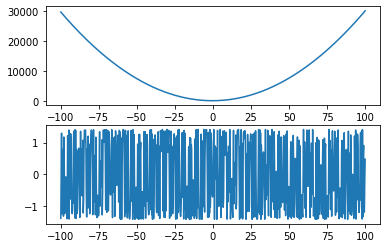

In [3]:
#Ejercicio 2
valores = list(np.arange(-100,100.25,0.25))
n = len(valores)
resultados1 = [0]*n
resultados2 = [0]*n
def f1():
    for indice in range(n):
        resultados1[indice]=3*(valores[indice]**2)+2*valores[indice]-1
        contador.incremento()
def f2():
    ci = 0
    while ci != n:
        if(ci < contador.value):
            resultados2[ci]=math.sin(resultados1[ci])+math.cos(resultados1[ci])
            ci += 1
if __name__ == '__main__':
    contador = Contador()
    t1 = Thread(target=f1)
    t2 = Thread(target=f2)
    t1.start()
    t2.start()
    t1.join()
    t2.join()
    mp.subplot(2,1,1)
    mp.plot(valores,resultados1)
    mp.subplot(2,1,2)
    mp.plot(valores,resultados2)

**Proceso de fabricación de dulces:**

Inicio: 

        1 máquina provee chicles
        
        1 máquina provee 1 unidad de polvo para cubrir al chicle
        

Procesos:


Proceso 1: Máquina que recibe el chicle y el polvo la cual cubre al chicle con el polvo.

Proceso 2: Máquina que recibe el bolichicle y lo envuelve.

Proceso 3: Máquina que recibe 10 bolichicles envueltos y los mete en una bolsa.

In [4]:
#Ejercicio 3
n = 1000
def generadorChicles():
    for i in range(n):
        contadorChicles.incremento()
    sprint("Ha terminado el proceso de produccion de chicles - Tiempo : "+str(contadorChicles.time-tiempo_inicial))
def generadorPolvos():
    for i in range(n):
        contadorPolvos.incremento()
    sprint("Ha terminado el proceso de produccion de polvos - Tiempo : "+str(contadorPolvos.time-tiempo_inicial))
def proceso1():
    ci = 0
    while ci != n:
        if(ci < contadorChicles.value and ci < contadorPolvos.value):
            contadorChiclesCubiertos.incremento()
            ci += 1
    sprint("Se finaliza la produccion de "+str(ci)+" chicles cubiertos.")
    sprint("Ha terminado el proceso 1 - Tiempo : "+str(contadorChiclesCubiertos.time-tiempo_inicial))
def proceso2():
    ci = 0
    while ci != n:
        if(ci < contadorChiclesCubiertos.value):
            contadorChiclesEnvueltos.incremento()
            ci += 1
    sprint("Se finaliza la produccion de "+str(ci)+" chicles envueltos.")
    sprint("Ha terminado el proceso 2 - Tiempo : "+str(contadorChiclesEnvueltos.time-tiempo_inicial))
def proceso3():
    ci = 0
    while ci != n/10:
        if(ci*10 < contadorChiclesEnvueltos.value):
            ci += 1
    sprint("Se finaliza la produccion de "+str(ci)+" bolsas de chicles.")
    sprint("Ha terminado el proceso 3 - Tiempo : "+str(time.time()-tiempo_inicial))
if __name__ == '__main__':
    contadorChicles = Contador()
    contadorPolvos = Contador()
    contadorChiclesCubiertos = Contador()
    contadorChiclesEnvueltos = Contador()
    threads = []
    threads.append(Thread(target=generadorChicles))
    threads.append(Thread(target=generadorPolvos))
    threads.append(Thread(target=proceso1))
    threads.append(Thread(target=proceso2))
    threads.append(Thread(target=proceso3))
    tiempo_inicial = time.time()
    for t in threads:
        t.start()
    for t in threads:
        t.join()

Ha terminado el proceso de produccion de chicles - Tiempo : 0.0015113353729248047
Ha terminado el proceso de produccion de polvos - Tiempo : 0.0024509429931640625
Se finaliza la produccion de 1000 chicles cubiertos.
Ha terminado el proceso 1 - Tiempo : 0.009781360626220703
Se finaliza la produccion de 1000 chicles envueltos.
Ha terminado el proceso 2 - Tiempo : 0.01114344596862793
Se finaliza la produccion de 100 bolsas de chicles.
Ha terminado el proceso 3 - Tiempo : 0.011778831481933594
